In [1]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
# Importando librerias 
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
import io
data = io.BytesIO(uploaded["Salary_Data.csv"])   
data_df= pd.read_csv(data)

In [ ]:
data_df.head(30)
           

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data_df.describe()

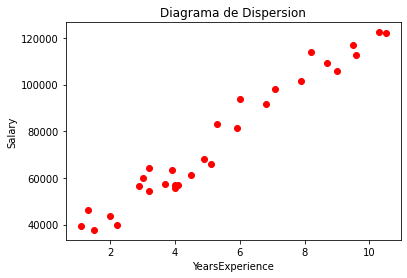

In [ ]:
# Plot
plt.scatter(data_df['YearsExperience'], data_df['Salary'], c= "red")
plt.title('Diagrama de Dispersion')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

**Después de analizar los datos y ver su comportamiento se procede a crear el Modelo y determinar las variables dependientes e independientes**


In [ ]:
x = data_df['YearsExperience']
x.head()
  

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [ ]:
y = data_df['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [ ]:
# Separar los datos para el entrenamiento y la evaluacion 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Convertir el eje de la columna X
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
print(x_train)

[[2. ]
 [5.3]
 [3.9]
 [4.9]
 [6. ]
 [4.5]
 [7.1]
 [2.9]
 [3.7]
 [8.7]
 [1.1]
 [4. ]
 [6.8]
 [7.9]
 [9.6]
 [9. ]
 [1.5]
 [1.3]
 [2.2]
 [5.1]
 [3.2]
 [3. ]
 [3.2]
 [5.9]]


In [ ]:
# Creando y entrenando el modelo 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Coeficiente de Regresion
coef_reg = model.coef_
print(coef_reg)

[9238.80375783]


In [ ]:
# Intercepcion
intercep = model.intercept_
print(intercep)

27036.289004871258


In [ ]:
# Predicciones hechas por el modelo (9383.9630148*x + 26156.317)
y_predictor = model.predict(x_test)
print(y_predictor)

[122195.96771051 102794.47981907 124043.72846207 114804.92470424
  63991.50403619  64915.38441197]


In [ ]:
# Valores Reales obtenidos 
print(y_test)

28    122391.0
23    113812.0
29    121872.0
26    116969.0
12     56957.0
13     57081.0
Name: Salary, dtype: float64


In [ ]:
# Evaluacion
from sklearn.metrics import r2_score
r2_score(y_test, y_predictor)

0.9529184551825656

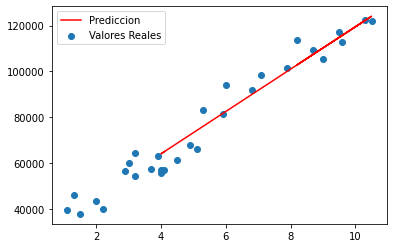

In [ ]:
# Visualizacion del Modelo
plt.scatter(x,y)
plt.plot(x_test, y_predictor, color = 'red')
plt.legend(['Prediccion', 'Valores Reales'])
plt.show()

